# Machine Learning With Python: Linear Regression With One Variable

# Example
<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

We're going to use `sklearn` to build our model, you can find the library tool in here [linear model](https://scikit-learn.org/stable/modules/linear_model.html).

In [1]:
import glob
glob.glob('*')

['homeprices.csv', 'linear-regression.ipynb']

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
# read csv file by pandas
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


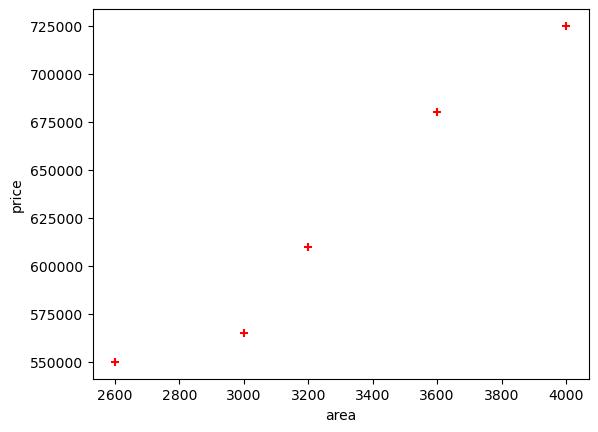

In [4]:
# Visualizing the distribution of housing prices
# we use the scatter chart in here
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.show()

In [5]:
# We try to remove the price value from dataframe table and save it to area_df
area_df = df.drop('price',axis='columns')
area_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
#For our original file, the data has not changed. We can still call the price data through df
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

### We will use sklearn.linear_model to train a linear regression model.

In [7]:
# prepare the training data X = area and Y = price
X_train = area_df
y_train = price

In [9]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

### After training, we use the trained model to make predictions
**(1) Predict price of a home with area = 3300 sqr ft**

In [10]:
# The input value is area, 
# The trained model will give us the corresponding house price.

reg.predict([[3300]])

C:\Users\nerf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

Let's look at the parameters of linear regression
$$y = m*x + b$$

Where **m** is the coefficient and **b** is the intercept

In [11]:
# check the m (coefficient) or slope
reg.coef_

array([135.78767123])

In [12]:
# check the b (intercept)
reg.intercept_

180616.43835616432

In [13]:
# Y = m * X + b (m is coefficient and b is intercept)
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [14]:
reg.predict([[5000]])

C:\Users\nerf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

### Visualize the results

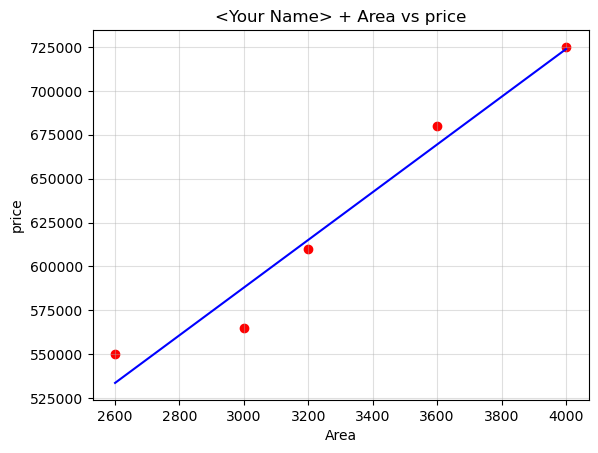

In [15]:
# Visualizing the training set
plt.scatter(X_train, y_train, color = 'red')
# plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('<Your Name> + Area vs price')
plt.xlabel('Area')
plt.ylabel('price')
plt.grid(alpha=0.4)
plt.show()

# What Makes Linear Regression Understandable? 
Linear regression is easy to understand because it generates a straight line that models the relationship between variables. The method uses the cost function, specifically [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE), to calculate the average distance of each data point from the line. By iteratively adjusting the line's slope and intercept, linear regression minimizes this distance, ensuring the line fits the data as accurately as possible.

Intuitively, MSE represents an aggregation of the distances between point's actual y value and what a hypothesis function $h_\theta(x)$ predicted it would be.  

\begin{align}
h_\theta(x) & = \theta_0 + \theta_1x_1 \\
\end{align}


That hypothesis function and the cost function $J(\theta)$ are defined as
\begin{align}
J(\theta) & = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{align}

where $\theta$ is a vector of feature weights, $x^{(i)}$ is the ith training example, $y^{(i)}$ is that example's y value, and $x_j$ is the value for its jth feature.

In [17]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.dot(X, theta) - y)) / (2 * len(y))

Before computing the cost with an initial guess for $\theta$, a column of 1s is prepended onto the input data.  This allows us to vectorize the cost function, as well as make it usable for multiple linear regression later.  This first value $\theta_0$ now behaves as a constant in the cost function.

In [18]:
theta = np.zeros(2) # we need two parameters -  Slope and Intercept

X = np.column_stack((np.ones(len(area_df)), area_df/1000))
y = price/1000
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0. 0.]
cost: 198185.0


In [20]:
X

array([[1. , 2.6],
       [1. , 3. ],
       [1. , 3.2],
       [1. , 3.6],
       [1. , 4. ]])

In [21]:
# Example for column_stack
import numpy as np
a = np.array((1,2,3))
b = np.array((2,3,4))

np.column_stack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

We'll now minimize the cost using the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm.  Intuitively, gradient descent takes small, linear hops down the slope of a function in each feature dimension, with the size of each hop determined by the partial derivative of the cost function with respect to that feature and a learning rate multiplier $\alpha$.  If tuned properly, the algorithm converges on a global minimum by iteratively adjusting feature weights $\theta$ of the cost function, as shown here for two feature dimensions:

\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{\partial}{\partial\theta_0} J(\theta_0,\theta_1) \\
\theta_1 & := \theta_1 - \alpha\frac{\partial}{\partial\theta_1} J(\theta_0,\theta_1) 
\end{align}

The update rule each iteration then becomes:

\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \\
\theta_1 & := \theta_1 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_1^{(i)} \\
\end{align}


In [26]:
# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Performs gradient descent to minimize the cost function and find the optimal parameters.
    
    Parameters:
    X: ndarray
        Input feature matrix, where rows are samples and columns are features.
    y: ndarray
        Target values corresponding to the input data.
    alpha: float
        Learning rate to control the step size of parameter updates.
    iterations: int
        Number of iterations to run gradient descent.

    Returns:
    theta: ndarray
        Optimized parameters for the linear model.
    """
    theta = np.zeros(2)  # Initialize theta with zeros (2 parameters for simple linear regression)
    m = len(y)           # Number of training examples

    # Iterate to update theta
    for i in range(iterations):
        # Update theta[0] (intercept term) using the gradient of the cost function
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        
        # Update theta[1] (slope term) using the gradient of the cost function
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        
        # Update theta as a new array with the computed values
        theta = np.array([t0, t1])

    return theta

# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.1

# Call the gradient descent function to compute optimized parameters
theta = gradient_descent(X, y, alpha, iterations)

# Compute the cost using the optimized parameters
cost = compute_cost(X, y, theta)

# Print the results
print("theta:", theta)  # Optimized values for theta (intercept and slope)
print('cost:', compute_cost(X, y, theta))  # Final cost value to evaluate the fit


theta: [180.60905845 135.78987731]
cost: 93.40753482537946


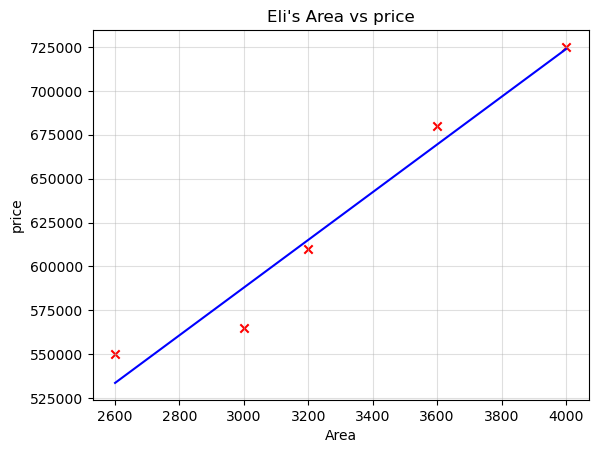

In [27]:
plt.scatter(area_df, price, marker='x', color='red')
samples = np.linspace(np.min(area_df), np.max(area_df))
plt.plot(samples, theta[0]*1000 + theta[1] * samples,color = 'blue')

# plt.plot(X_train, reg.predict(X_train), color = 'Green')
plt.title('Eli\'s Area vs price')
plt.xlabel('Area')
plt.ylabel('price')
plt.grid(alpha=0.4)
plt.show()